In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Matplotlib is a low level graph plotting library in python that serves as a visualization utility.

#### Matplotlib was created by John D. Hunter.

#### Matplotlib is open source and we can use it freely.

#### Matplotlib is mostly written in python, a few segments are written in C, Objective-C and Javascript for Platform compatibility.

Matplotlib graphs your data on **Figures** (i.e., windows, Jupyter widgets, etc.), each of which can contain one or more **Axes** (i.e., an area where points can be specified in terms of x-y coordinates, or theta-r in a polar plot, or x-y-z in a 3D plot, etc.). The simplest way of creating a figure with an axes is using pyplot.subplots. We can then use Axes.plot to draw some data on the axes:

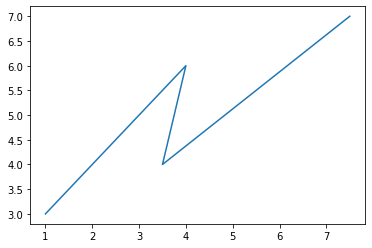

In [35]:
fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.plot([1, 4, 3.5, 7.5], [3, 6, 4, 7])  # Plot some data on the axes.

### Parts of a Figure

![text](anatomy.webp "Title")

#### Figure

The whole figure. The figure keeps track of all the child **Axes**, a smattering of 'special' artists (titles, figure legends, etc), and the canvas. (more-or-less invisible to the user/programmer). A figure can contain any number of Axes, but will typically have at least one.

The easiest way to create a new figure is with pyplot:

<Figure size 432x288 with 0 Axes>

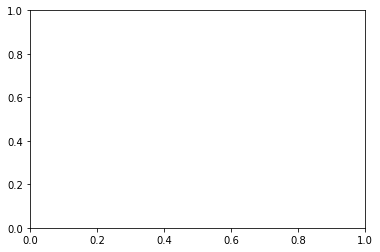

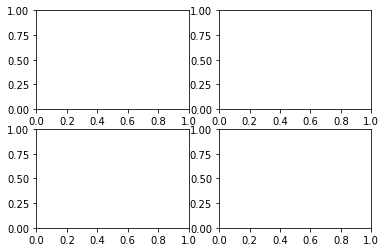

In [111]:
fig = plt.figure()  # an empty figure with no Axes
fig, ax = plt.subplots()  # a figure with a single Axes
fig, axs = plt.subplots(2, 2)  # a figure with a 2x2 grid of Axes

#### Axes

This is what you think of as 'a plot', it is the region of the image with the data space. 

A given figure can contain many Axes, but a given Axes object can only be in one Figure. 

The Axes contains two (or three in the case of 3D) **Axis** objects (be aware of the difference between Axes and Axis) which take care of the data limits (the data limits can also be controlled via the axes.Axes.set_xlim() and axes.Axes.set_ylim() methods). Each Axes has a title (set via set_title()), an x-label (set via set_xlabel()), and a y-label set via set_ylabel()).

#### Axis

These are the number-line-like objects. They take care of setting the graph limits and generating the **ticks** (the marks on the axis) and **ticklabels** (strings labeling the ticks). The location of the ticks is determined by a **Locator** object and the ticklabel strings are formatted by a **Formatter**. The combination of the correct Locator and Formatter gives very fine control over the tick locations and labels.

#### Types of inputs to plotting functions

All of plotting functions expect **numpy.array** or **numpy.ma.masked_array** as input. Classes that are 'array-like' such as pandas data objects and numpy.matrix may or may not work as intended. It is best to convert these to numpy.array objects prior to plotting.

#### The object-oriented interface and the pyplot interface

There are essentially two ways to use Matplotlib:

- Explicitly create figures and axes, and call methods on them (the "object-oriented (OO) style").

- Rely on pyplot to automatically create and manage the figures and axes, and use pyplot functions for plotting.

##### OO style:

In [116]:
x = np.linspace(0, 2, 100)

# Note that even in the OO-style, we use `.pyplot.figure` to create the figure.
fig, ax = plt.subplots()  # Create a figure and an axes.

ax.plot(x, x, label='linear')  # Plot some data on the axes.
ax.plot(x, x**2, label='quadratic')  # Plot more data on the axes...
ax.plot(x, x**3, label='cubic')  # ... and some more.

ax.set_xlabel('x label')  # Add an x-label to the axes.
ax.set_ylabel('y label')  # Add a y-label to the axes.

ax.set_title("Simple Plot")  # Add a title to the axes.
ax.legend()  # Add a legend.

##### pyplot style

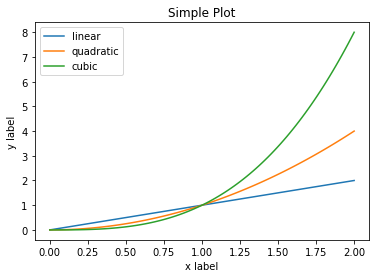

In [117]:
x = np.linspace(0, 2, 100)

plt.plot(x, x, label='linear')  # Plot some data on the (implicit) axes.
plt.plot(x, x**2, label='quadratic')  # etc.
plt.plot(x, x**3, label='cubic')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Simple Plot")
plt.legend()

Note: the pyplot API is generally less-flexible than the object-oriented API.

##### Quick visualization:

In [118]:
plt.plot([1, 2, 3, 4])
plt.ylabel('some numbers')
plt.show()

Note the 0-3 on x-axis

plot() is versatile:

In [50]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])

When plotting two pairs of arguments, plot() accepts a third argument representing the format. By default it is 'b-', which means a blue line.

You can change it however you want. For example, a red circle:

In [51]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'ro')
plt.axis([0, 6, 0, 20])
plt.show()

The axis function in the example above takes a list of [xmin, xmax, ymin, ymax] and specifies the viewport of the axes.

In [122]:
# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

In [121]:
t

array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4,
       2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8])

More on styles: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

##### Plotting with keyword strings

There are some instances where you have data in a format that lets you access particular variables with strings, ex. pandas.DataFrame.

In [124]:
data

{'a': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 'c': array([42, 49, 25, 12, 38, 26,  7, 23, 21, 48, 25,  9, 30, 13,  0, 11,  9,
        20,  2, 36, 44, 26,  6, 14, 22, 12, 48, 20, 36, 28, 13, 40,  8,  9,
         3, 17, 30, 12, 16, 32, 30, 13,  4, 26,  5, 49, 44, 25, 34, 40]),
 'd': array([ 23.43431699,  79.82686444,  52.94283373,  57.94718055,
         41.19942117, 106.82781349,  99.82888047,  13.27094355,
         30.53049367,  81.64170139, 210.74701422,  48.0639154 ,
         96.66671526,  11.14878725,  45.52019857,  64.63761225,
        196.12948642,   3.67452277,  80.40909664,  54.57186477,
         57.51554039,  99.06064761, 135.09058689, 131.07771602,
        219.40475366,  21.9065159 , 184.64863777, 171.76600327,
         37.12922832, 193.41080417, 152.993644  , 177.69936146,
         52.0128184 ,

Matplotlib allows you provide such an object with the data keyword argument. If provided, then you may generate plots with the strings corresponding to these variables.

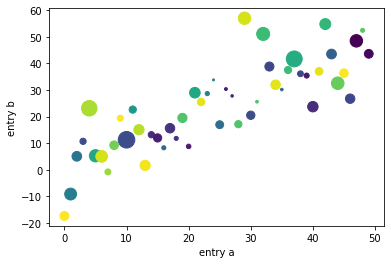

In [125]:
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

plt.scatter('a', 'b', c='c', s='d', data=data)
plt.xlabel('entry a')
plt.ylabel('entry b')
plt.show()

`plt.scatter()` arguments:

- first and second: data to plot
- c: The marker colors
- s: The marker size

##### Plotting with categorical variables

In [130]:
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]

plt.figure(figsize=(12, 5))

plt.subplot(1,3,1)
plt.bar(names, values)

plt.subplot(132)
plt.scatter(names, values)

plt.subplot(133)
plt.plot(names, values)

plt.suptitle('Categorical Plotting')
plt.show()

##### Working with multiple figures and axes

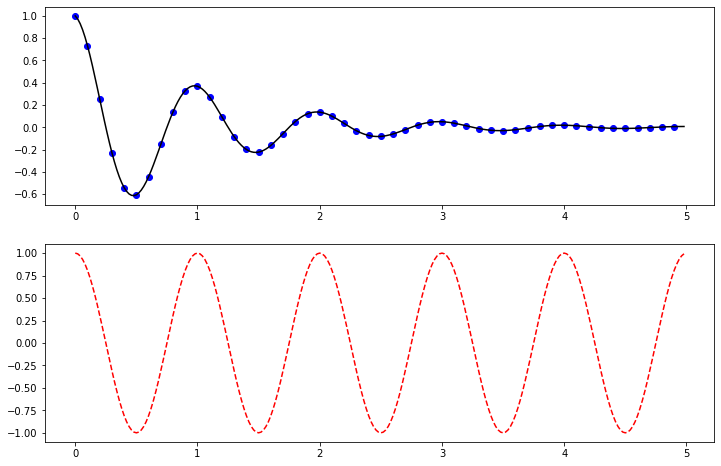

In [135]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure(figsize=(12,8))
plt.subplot(2,1,1)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(2,1,2)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

##### Working with text

**text** can be used to add text in an arbitrary location, and **xlabel**, **ylabel** and **title** are used to add text in the indicated locations

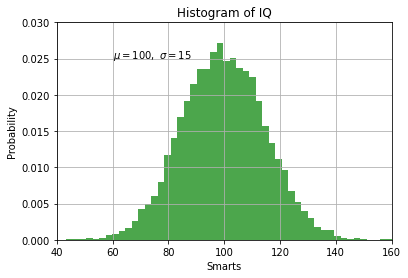

In [136]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, density=1, facecolor='g', alpha=0.7)


plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()


##### Annotating text

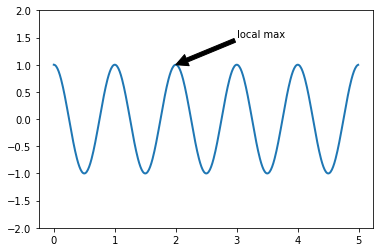

In [140]:
ax = plt.subplot()

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = plt.plot(t, s, lw=2)

plt.annotate(
    'local max', 
    xy=(2, 1), 
    xytext=(3, 1.5),
    arrowprops=dict(facecolor='black'),
)

plt.ylim(-2, 2)
plt.show()

##### Logarithmic and other nonlinear axes

matplotlib.pyplot supports not only linear axis scales, but also logarithmic and logit scales. This is commonly used if data spans many orders of magnitude. Changing the scale of an axis is easy:


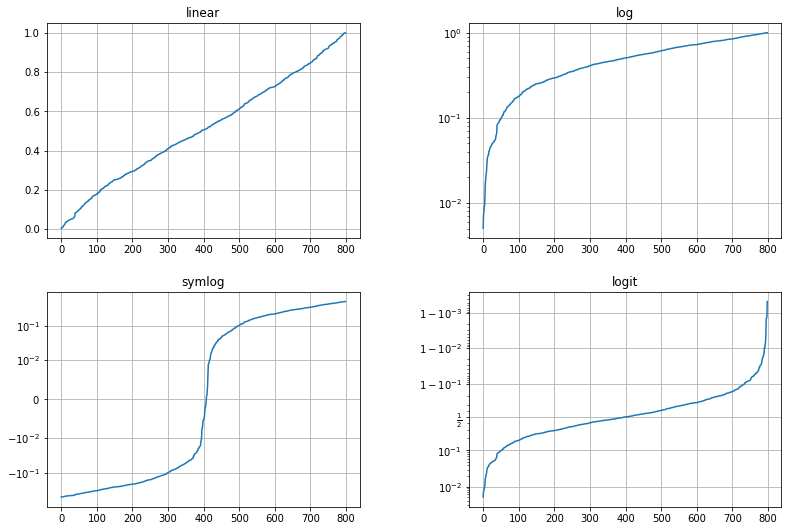

In [69]:
# Fixing random state for reproducibility
np.random.seed(19680801)

# make up some data in the open interval (0, 1)
y = np.random.normal(loc=0.5, scale=0.4, size=1000)
y = y[(y > 0) & (y < 1)]
y.sort()
x = np.arange(len(y))

# plot with various axes scales
plt.figure(figsize=(12,8))

# linear
plt.subplot(221)
plt.plot(x, y)
plt.yscale('linear')
plt.title('linear')
plt.grid(True)

# log
plt.subplot(222)
plt.plot(x, y)
plt.yscale('log')
plt.title('log')
plt.grid(True)

# symmetric log
plt.subplot(223)
plt.plot(x, y - y.mean())
plt.yscale('symlog', linthresh=0.01)
plt.title('symlog')
plt.grid(True)

# logit
plt.subplot(224)
plt.plot(x, y)
plt.yscale('logit')
plt.title('logit')
plt.grid(True)
# Adjust the subplot layout, because the logit one may take more space
# than usual, due to y-tick labels like "1 - 10^{-3}"
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)

plt.show()

### Different types of plots:

#### Line

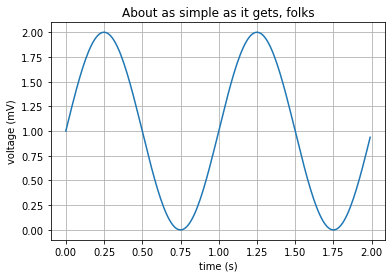

In [73]:
# Data for plotting
t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2 * np.pi * t)

fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='time (s)', ylabel='voltage (mV)',
       title='About as simple as it gets, folks')
ax.grid()

fig.savefig("test.png")
plt.show()

#### Histogram



In [74]:
# example data
mu = 100  # mean of distribution
sigma = 15  # standard deviation of distribution
x = mu + sigma * np.random.randn(437)

num_bins = 50

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(x, num_bins, density=True)

# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')
ax.set_xlabel('Smarts')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram of IQ: $\mu=100$, $\sigma=15$')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

#### Paths

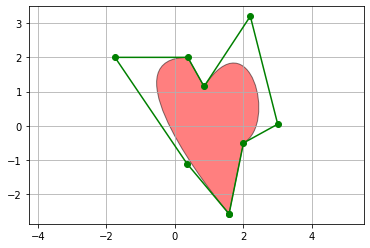

In [76]:
import matplotlib.path as mpath
import matplotlib.patches as mpatches

fig, ax = plt.subplots()

Path = mpath.Path
path_data = [
    (Path.MOVETO, (1.58, -2.57)),
    (Path.CURVE4, (0.35, -1.1)),
    (Path.CURVE4, (-1.75, 2.0)),
    (Path.CURVE4, (0.375, 2.0)),
    (Path.LINETO, (0.85, 1.15)),
    (Path.CURVE4, (2.2, 3.2)),
    (Path.CURVE4, (3, 0.05)),
    (Path.CURVE4, (2.0, -0.5)),
    (Path.CLOSEPOLY, (1.58, -2.57)),
    ]
codes, verts = zip(*path_data)
path = mpath.Path(verts, codes)
patch = mpatches.PathPatch(path, facecolor='r', alpha=0.5)
ax.add_patch(patch)

# plot control points and connecting lines
x, y = zip(*path.vertices)
line, = ax.plot(x, y, 'go-')

ax.grid()
ax.axis('equal')
plt.show()

#### 3D plots

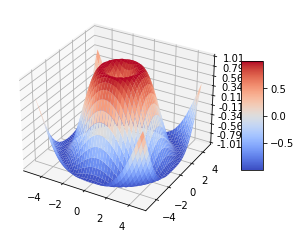

In [141]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

#### Bar

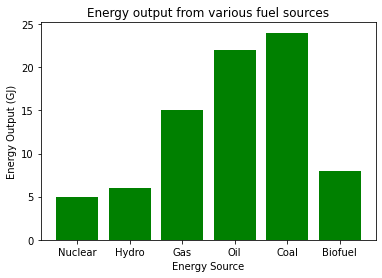

In [84]:
x = ['Nuclear', 'Hydro', 'Gas', 'Oil', 'Coal', 'Biofuel']
energy = [5, 6, 15, 22, 24, 8]

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, energy, color='green')
plt.xlabel("Energy Source")
plt.ylabel("Energy Output (GJ)")
plt.title("Energy output from various fuel sources")

plt.xticks(x_pos, x)

plt.show()

#### Pie

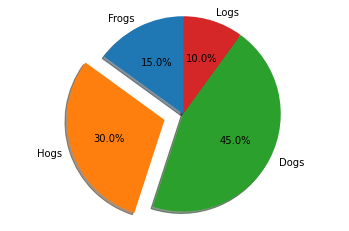

In [152]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['Frogs', 'Hogs', 'Dogs', 'Logs']
sizes = [15, 30, 45, 10]
explode = (0, 0.2, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [92]:
pop = [31.889923, 3.600523, 33.333216, 12.420476, 40.301927, 20.434176, 8.199783, 0.708573, 150.448339, 10.392226, 8.078314, 9.119152, 4.552198, 1.639131, 190.010647, 7.322858, 14.326203, 8.390505, 14.131858, 17.696293, 33.390141, 4.369038, 10.238807, 16.284741, 1318.683096, 44.22755, 0.71096, 64.606759, 3.80061, 4.133884, 18.013409, 4.493312, 11.416987, 10.228744, 5.46812, 0.496374, 9.319622, 13.75568, 80.264543, 6.939688, 0.551201, 4.906585, 76.511887, 5.23846, 61.083916, 1.454867, 1.688359, 82.400996, 22.873338, 10.70629, 12.572928, 9.947814, 1.472041, 8.502814, 7.483763, 6.980412, 9.956108, 0.301931, 1110.396331, 223.547, 69.45357, 27.499638, 4.109086, 6.426679, 58.147733, 2.780132, 127.467972, 6.053193, 35.610177, 23.301725, 49.04479, 2.505559, 3.921278, 2.012649, 3.193942, 6.036914, 19.167654, 13.327079, 24.821286, 12.031795, 3.270065, 1.250882, 108.700891, 2.874127, 0.684736, 33.757175, 19.951656, 47.76198, 2.05508, 28.90179, 16.570613, 4.115771, 5.675356, 12.894865, 135.031164, 4.627926, 3.204897, 169.270617, 3.242173, 6.667147, 28.674757, 91.077287, 38.518241, 10.642836, 3.942491, 0.798094, 22.276056, 8.860588, 0.199579, 27.601038, 12.267493, 10.150265, 6.144562, 4.553009, 5.447502, 2.009245, 9.118773, 43.997828, 40.448191, 20.378239, 42.292929, 1.133066, 9.031088, 7.554661, 19.314747, 23.174294, 38.13964, 65.068149, 5.701579, 1.056608, 10.276158, 71.158647, 29.170398, 60.776238, 301.139947, 3.447496, 26.084662, 85.262356, 4.018332, 22.211743, 11.746035, 12.311143]
gdp_cap = [974.5803384, 5937.029525999998, 6223.367465, 4797.231267, 12779.37964, 34435.367439999995, 36126.4927, 29796.04834, 1391.253792, 33692.60508, 1441.284873, 3822.137084, 7446.298803, 12569.85177, 9065.800825, 10680.79282, 1217.032994, 430.0706916, 1713.778686, 2042.09524, 36319.23501, 706.016537, 1704.063724, 13171.63885, 4959.114854, 7006.580419, 986.1478792, 277.5518587, 3632.557798, 9645.06142, 1544.750112, 14619.222719999998, 8948.102923, 22833.30851, 35278.41874, 2082.4815670000007, 6025.3747520000015, 6873.262326000001, 5581.180998, 5728.353514, 12154.08975, 641.3695236000002, 690.8055759, 33207.0844, 30470.0167, 13206.48452, 752.7497265, 32170.37442, 1327.60891, 27538.41188, 5186.050003, 942.6542111, 579.2317429999998, 1201.637154, 3548.3308460000007, 39724.97867, 18008.94444, 36180.78919, 2452.210407, 3540.651564, 11605.71449, 4471.061906, 40675.99635, 25523.2771, 28569.7197, 7320.8802620000015, 31656.06806, 4519.461171, 1463.249282, 1593.06548, 23348.139730000006, 47306.98978, 10461.05868, 1569.331442, 414.5073415, 12057.49928, 1044.770126, 759.3499101, 12451.6558, 1042.581557, 1803.151496, 10956.99112, 11977.57496, 3095.7722710000007, 9253.896111, 3820.17523, 823.6856205, 944.0, 4811.060429, 1091.359778, 36797.93332, 25185.00911, 2749.320965, 619.6768923999998, 2013.977305, 49357.19017, 22316.19287, 2605.94758, 9809.185636, 4172.838464, 7408.905561, 3190.481016, 15389.924680000002, 20509.64777, 19328.70901, 7670.122558, 10808.47561, 863.0884639000002, 1598.435089, 21654.83194, 1712.472136, 9786.534714, 862.5407561000002, 47143.17964, 18678.31435, 25768.25759, 926.1410683, 9269.657808, 28821.0637, 3970.095407, 2602.394995, 4513.480643, 33859.74835, 37506.41907, 4184.548089, 28718.27684, 1107.482182, 7458.396326999998, 882.9699437999999, 18008.50924, 7092.923025, 8458.276384, 1056.380121, 33203.26128, 42951.65309, 10611.46299, 11415.80569, 2441.576404, 3025.349798, 2280.769906, 1271.211593, 469.70929810000007]
life_exp = [43.828, 76.423, 72.301, 42.731, 75.32, 81.235, 79.829, 75.635, 64.062, 79.441, 56.728, 65.554, 74.852, 50.728, 72.39, 73.005, 52.295, 49.58, 59.723, 50.43, 80.653, 44.74100000000001, 50.651, 78.553, 72.961, 72.889, 65.152, 46.462, 55.322, 78.782, 48.328, 75.748, 78.273, 76.486, 78.332, 54.791, 72.235, 74.994, 71.33800000000002, 71.878, 51.57899999999999, 58.04, 52.947, 79.313, 80.657, 56.735, 59.448, 79.406, 60.022, 79.483, 70.259, 56.007, 46.38800000000001, 60.916, 70.19800000000001, 82.208, 73.33800000000002, 81.757, 64.69800000000001, 70.65, 70.964, 59.545, 78.885, 80.745, 80.546, 72.567, 82.603, 72.535, 54.11, 67.297, 78.623, 77.58800000000002, 71.993, 42.592, 45.678, 73.952, 59.44300000000001, 48.303, 74.241, 54.467, 64.164, 72.801, 76.195, 66.803, 74.543, 71.164, 42.082, 62.069, 52.90600000000001, 63.785, 79.762, 80.204, 72.899, 56.867, 46.859, 80.196, 75.64, 65.483, 75.53699999999998, 71.752, 71.421, 71.688, 75.563, 78.098, 78.74600000000002, 76.442, 72.476, 46.242, 65.528, 72.777, 63.062, 74.002, 42.56800000000001, 79.972, 74.663, 77.926, 48.159, 49.339, 80.941, 72.396, 58.556, 39.613, 80.884, 81.70100000000002, 74.143, 78.4, 52.517, 70.616, 58.42, 69.819, 73.923, 71.777, 51.542, 79.425, 78.242, 76.384, 73.747, 74.249, 73.422, 62.698, 42.38399999999999, 43.487]

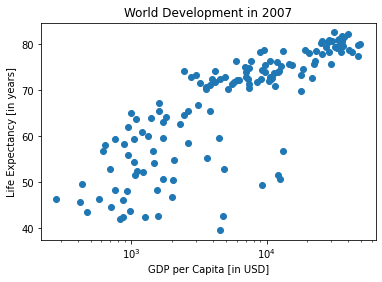

In [156]:
# Basic scatter plot, log scale
plt.scatter(gdp_cap, life_exp)
plt.xscale('log') 

# Strings
xlab = 'GDP per Capita [in USD]'
ylab = 'Life Expectancy [in years]'
title = 'World Development in 2007'

# Add axis labels
plt.xlabel(xlab)
plt.ylabel(ylab)

# Add title
plt.title(title)

# After customizing, display the plot
plt.show()

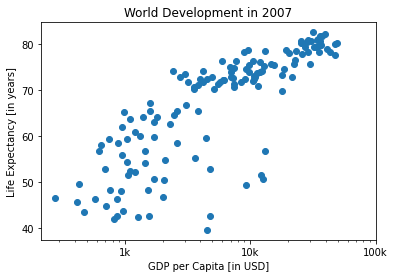

In [94]:
# Scatter plot
plt.scatter(gdp_cap, life_exp)

# Previous customizations
plt.xscale('log') 
plt.xlabel('GDP per Capita [in USD]')
plt.ylabel('Life Expectancy [in years]')
plt.title('World Development in 2007')

# Definition of tick_val and tick_lab
tick_val = [1000, 10000, 100000]
tick_lab = ['1k', '10k', '100k']

# Adapt the ticks on the x-axis
plt.xticks(tick_val, tick_lab)

# After customizing, display the plot
plt.show()

In [95]:
# Store pop as a numpy array: np_pop
np_pop = np.array(pop)

# Double np_pop
np_pop = np_pop * 2

# Update: set s argument to np_pop
plt.scatter(gdp_cap, life_exp, s = np_pop)

# Previous customizations
plt.xscale('log') 
plt.xlabel('GDP per Capita [in USD]')
plt.ylabel('Life Expectancy [in years]')
plt.title('World Development in 2007')
plt.xticks([1000, 10000, 100000],['1k', '10k', '100k'])

# Display the plot
plt.show()

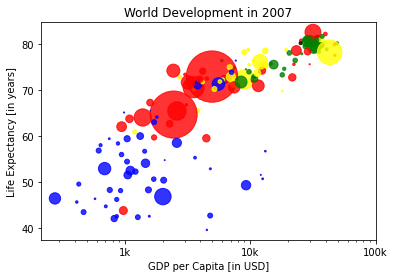

In [96]:
# some variables used
col = ['red', 'green', 'blue', 'blue', 'yellow', 'black', 'green', 'red', 'red', 'green', 'blue', 'yellow', 'green', 'blue', 'yellow', 'green', 'blue', 'blue', 'red', 'blue', 'yellow', 'blue', 'blue', 'yellow', 'red', 'yellow', 'blue', 'blue', 'blue', 'yellow', 'blue', 'green', 'yellow', 'green', 'green', 'blue', 'yellow', 'yellow', 'blue', 'yellow', 'blue', 'blue', 'blue', 'green', 'green', 'blue', 'blue', 'green', 'blue', 'green', 'yellow', 'blue', 'blue', 'yellow', 'yellow', 'red', 'green', 'green', 'red', 'red', 'red', 'red', 'green', 'red', 'green', 'yellow', 'red', 'red', 'blue', 'red', 'red', 'red', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'blue', 'blue', 'blue', 'yellow', 'red', 'green', 'blue', 'blue', 'red', 'blue', 'red', 'green', 'black', 'yellow', 'blue', 'blue', 'green', 'red', 'red', 'yellow', 'yellow', 'yellow', 'red', 'green', 'green', 'yellow', 'blue', 'green', 'blue', 'blue', 'red', 'blue', 'green', 'blue', 'red', 'green', 'green', 'blue', 'blue', 'green', 'red', 'blue', 'blue', 'green', 'green', 'red', 'red', 'blue', 'red', 'blue', 'yellow', 'blue', 'green', 'blue', 'green', 'yellow', 'yellow', 'yellow', 'red', 'red', 'red', 'blue', 'blue']

# Specify c and alpha inside plt.scatter()
plt.scatter(x = gdp_cap, y = life_exp, s = np.array(pop) * 2, c = col, alpha = 0.8)

# Previous customizations
plt.xscale('log') 
plt.xlabel('GDP per Capita [in USD]')
plt.ylabel('Life Expectancy [in years]')
plt.title('World Development in 2007')
plt.xticks([1000,10000,100000], ['1k','10k','100k'])

# Show the plot
plt.show()

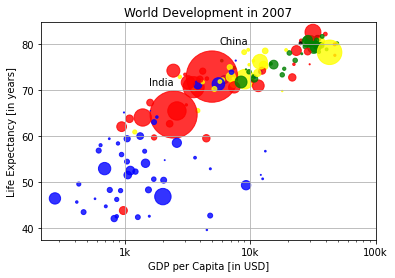

In [97]:
# Scatter plot
plt.scatter(x = gdp_cap, y = life_exp, s = np.array(pop) * 2, c = col, alpha = 0.8)

# Previous customizations
plt.xscale('log') 
plt.xlabel('GDP per Capita [in USD]')
plt.ylabel('Life Expectancy [in years]')
plt.title('World Development in 2007')
plt.xticks([1000,10000,100000], ['1k','10k','100k'])

# Additional customizations
plt.text(1550, 71, 'India')
plt.text(5700, 80, 'China')

# Add grid() call
plt.grid(True)

# Show the plot
plt.show()

#### Dates

In [157]:
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

# Load a numpy structured array from yahoo csv data with fields date, open,
# close, volume, adj_close from the mpl-data/example directory.  This array
# stores the date as an np.datetime64 with a day unit ('D') in the 'date'
# column.
data = cbook.get_sample_data('goog.npz', np_load=True)['price_data']

fig, ax = plt.subplots()
ax.plot('date', 'adj_close', data=data)

# Major ticks every 6 months.
fmt_half_year = mdates.MonthLocator(interval=6)
ax.xaxis.set_major_locator(fmt_half_year)

# Minor ticks every month.
fmt_month = mdates.MonthLocator()
ax.xaxis.set_minor_locator(fmt_month)

# Text in the x axis will be displayed in 'YYYY-mm' format.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Round to nearest years.
datemin = np.datetime64(data['date'][0], 'Y')
datemax = np.datetime64(data['date'][-1], 'Y') + np.timedelta64(1, 'Y')
ax.set_xlim(datemin, datemax)

# Format the coords message box, i.e. the numbers displayed as the cursor moves
# across the axes within the interactive GUI.
ax.format_xdata = mdates.DateFormatter('%Y-%m')
ax.format_ydata = lambda x: f'${x:.2f}'  # Format the price.
ax.grid(True)

# Rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them.
fig.autofmt_xdate()

plt.show()

In [158]:
data

array([('2004-08-19', 100.  , 104.06,  95.96, 100.34, 22351900, 100.34),
       ('2004-08-20', 101.01, 109.08, 100.5 , 108.31, 11428600, 108.31),
       ('2004-08-23', 110.75, 113.48, 109.05, 109.4 ,  9137200, 109.4 ),
       ...,
       ('2008-10-10', 313.16, 341.89, 310.3 , 332.  , 10597800, 332.  ),
       ('2008-10-13', 355.79, 381.95, 345.75, 381.02,  8905500, 381.02),
       ('2008-10-14', 393.53, 394.5 , 357.  , 362.71,  7784800, 362.71)],
      dtype=[('date', '<M8[D]'), ('open', '<f8'), ('high', '<f8'), ('low', '<f8'), ('close', '<f8'), ('volume', '<i8'), ('adj_close', '<f8')])

#### Legends`

In [163]:
# Make some fake data.
a = b = np.arange(0, 3, .02)
c = np.exp(a)
d = c[::-1]

# Create plots with pre-defined labels.
fig, ax = plt.subplots()
ax.plot(a, c, 'k--', label='Model length')
ax.plot(a, d, 'k:', label='Data length')
ax.plot(a, c + d, 'k', label='Total message length')

legend = ax.legend(loc='upper center', shadow=True, fontsize='x-large')

# Put a nicer background color on the legend.
legend.get_frame().set_facecolor('C0')

plt.show()

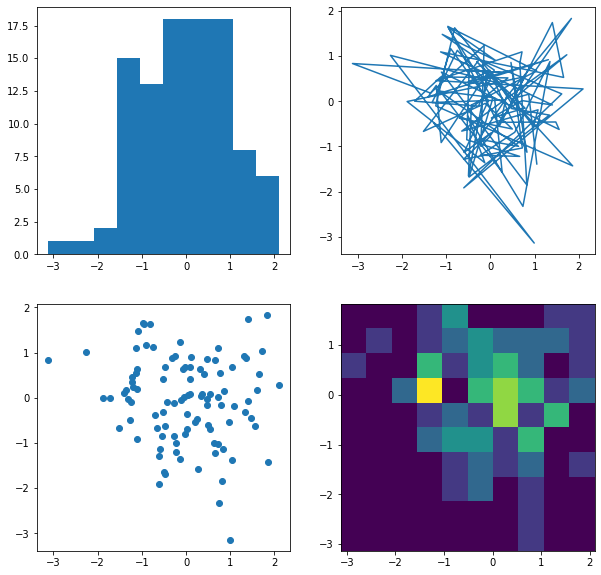

In [164]:
np.random.seed(19680801)
data = np.random.randn(2, 100)

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0, 0].hist(data[0])
axs[1, 0].scatter(data[0], data[1])
axs[0, 1].plot(data[0], data[1])
axs[1, 1].hist2d(data[0], data[1])

plt.show()

More on plotting multiple subplots: https://matplotlib.org/devdocs/gallery/subplots_axes_and_figures/subplots_demo.html

#### Matpltolib can also plot images

Matplotlib relies on the Pillow library to load image data. But you can work with other packages as well (cv2, for example)

In [102]:
import matplotlib.image as mpimg

In [165]:
img = mpimg.imread('friends.jpg')
print(img.shape)

(1000, 1500, 3)


In [166]:
plt.imshow(img)

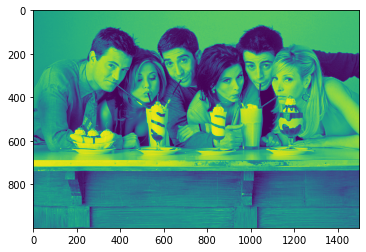

In [105]:
lum_img = img[:, :, 0]

plt.imshow(lum_img)

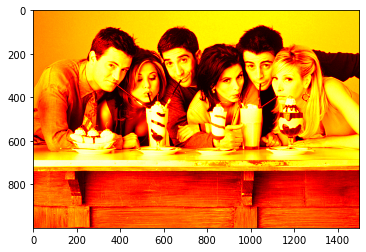

In [106]:
plt.imshow(lum_img, cmap="hot")

In [107]:
imgplot = plt.imshow(lum_img)
imgplot.set_cmap('nipy_spectral')

In [109]:
imgplot = plt.imshow(lum_img)
plt.colorbar()